# **Lang-Segment-Anything**

**LangSAM** is a powerful tool that uses natural language inputs (such as text) to create bounding boxes (aided by GroundingDINO) around very specific segments for the natural language inputs' corresponding objects. It utilizes PyTorch. Below, we install both PyTorch and utilize the open-source LangSAM software.

In [ ]:
!pip install torch torchvision
!git clone https://github.com/luca-medeiros/lang-segment-anything.git

fatal: destination path 'lang-segment-anything' already exists and is not an empty directory.


In [ ]:
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-9kqy9f5f
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-9kqy9f5f
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit e9af744d999d85eb4d0bd59a83342ecdc2bd2461
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached sam_2-1.0-cp311-cp311-linux_x86_64.whl


We use the **PIL Library** to process and analyze images, and then, we import the lang_sam library which is located in the Git commit we instantiated in the previous boxes of code. Finally, NumPy is used in conjunction with MatPlotLib to process and display the segments within the images.

In [ ]:
# Import Python-integrated modules
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import os
import seaborn as sns
import cv2
import torch
import torch.nn.functional as F

# Import all of the relevant modules from the Github commits (LangSAM and RoMa)
from lang_sam import LangSAM
from lang_sam.utils import draw_image

The next line of code instantiates the ``model`` variable, which is utilized throughout the code whenever we want to utilize the LangSAM segmentation program. It downloads LangSAM into the program.

In [ ]:
model = LangSAM()

Downloading: "https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt" to /root/.cache/torch/hub/checkpoints/sam2.1_hiera_small.pt
100%|██████████| 176M/176M [00:08<00:00, 22.3MB/s]
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/933M [00:00<?, ?B/s]

We utilize ``VISUAL01040803.jpg``, which is one of the pictures from the **FLIR infrared camera** I and my group took last year. The ``text_prompt`` variable can take in any object name, and based on the training set that LangSAM uses, it predicts, from ``VISUAL01040803.jpg``, where the object is located. Using ``GroundingDINO``, it creates a bounding box, and LangSAM's internal code, via Meta's ``Segment Anything`` model conducts the segmentation. Finally, MatPlotLib is used for displaying the image. Alternatively, ``lightening``, a Pytorch functionality, can open the image and its properties in a separate screen, but Google Colab does not support an external server beyond its own cloud-hosted runtime.

Predicting 1 masks
Predicted 1 masks


Predicting 1 masks
Predicted 1 masks
[{'scores': array([0.43158415, 0.35756752], dtype=float32), 'labels': ['sidewalk', 'sidewalk'], 'boxes': array([[7.17782974e-02, 7.95950317e+01, 1.60025558e+02, 1.19881393e+02],
       [2.07130337e+01, 7.99976807e+01, 1.55826157e+02, 1.19899895e+02]],
      dtype=float32), 'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32), 'mask_scores': array([0.8828125 , 0.97265625], dtype=float32)}]
[{'scores': array([0.3106944, 0.307358 , 0.3165805], dtype=float32), 'labels': ['sidewalk', 'sidewalk'

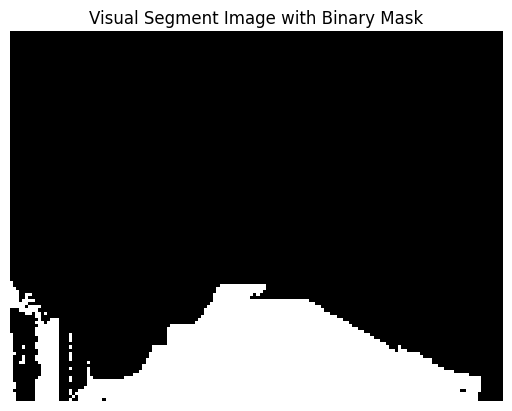

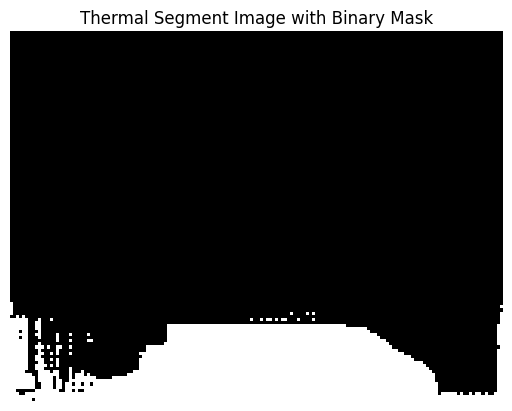

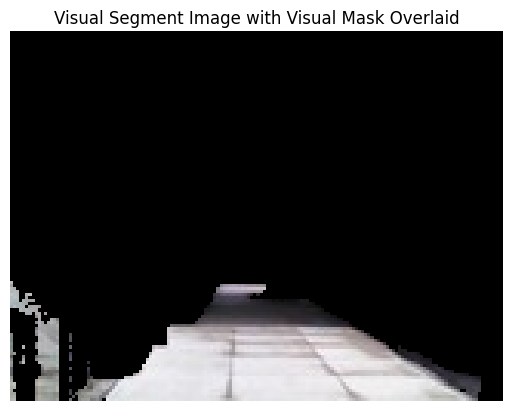

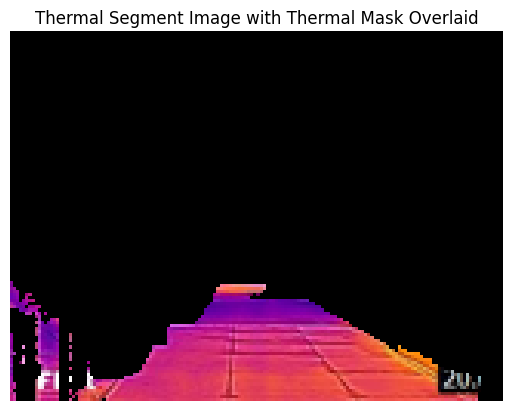

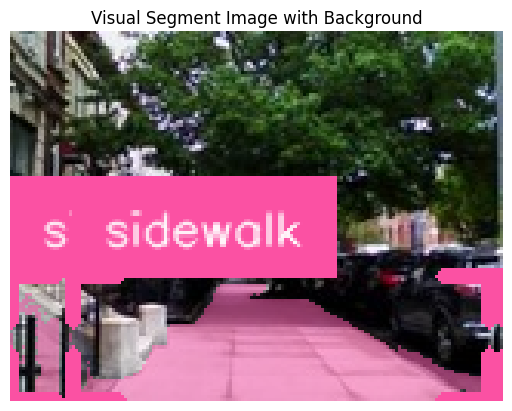

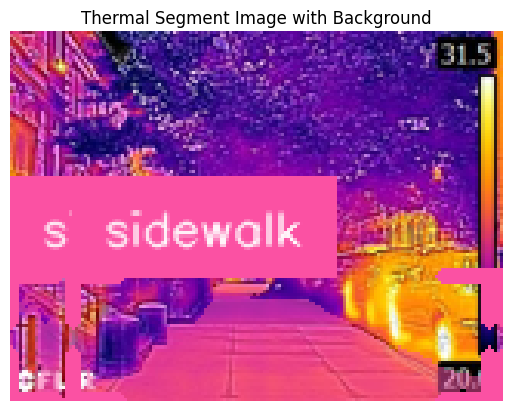

In [ ]:
image_pil = Image.open("/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/transect_1_morning_visual/VISUAL01AM0502.jpg").convert("RGB")
text_prompt = "sidewalk"
results = model.predict([image_pil], [text_prompt])

image_thermal = Image.open("/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/Field Campaign 2024 Data/FLIR Thermal Images/Transect #1/Morning/FLIR01AM0502.jpg").convert("RGB")
newsize = (160, 120)
image_thermal = image_thermal.resize(newsize)
text_prompt = "sidewalk"
results_2 = model.predict([image_thermal], [text_prompt])

print(results)
print(results_2)

image_np = np.array(image_pil)
result = results[0]
image = draw_image(image_np, result['masks'], result['boxes'], result['scores'], result['labels'])

# Function to get combined mask
def get_combined_mask(image, text_prompt):
    results = model.predict([image], [text_prompt])

    result = results[0]
    masks = result['masks']
    boxes = result['boxes']
    scores = result['scores']
    labels = result['labels']

    if len(masks) == 0:  # Check if masks list is empty
        return np.zeros((image.height, image.width), dtype=bool)

    # Ensure masks are converted to numpy arrays if not already
    masks = [mask.numpy() if not isinstance(mask, np.ndarray) else mask for mask in masks]

    combined_mask = np.zeros(masks[0].shape, dtype=bool)
    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask)
    return combined_mask

# Function to save combined mask
def save_combined_mask(image, text_prompt, save_path, image_name):
    combined_mask = get_combined_mask(image, text_prompt)
    mask_image = Image.fromarray((combined_mask * 255).astype(np.uint8))
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    mask_image.save(os.path.join(save_path, f"{image_name}_combined_mask.png"))

# Combined masks for visual and thermal images
combined_mask_visual = get_combined_mask(image_pil, text_prompt)
combined_mask_thermal = get_combined_mask(image_thermal, text_prompt)

# Save paths
save_path = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/Combined_Masks"

# Save combined masks
save_combined_mask(image_pil, "platform", save_path, "EXAMPLE")

# Convert the combined mask (for both thermal and visual) to an image
visualmask_image = Image.fromarray((combined_mask_visual * 255).astype(np.uint8))
thermalmask_image = Image.fromarray((combined_mask_thermal * 255).astype(np.uint8))

# Display the visual masked image only
plt.title("Visual Segment Image with Binary Mask")
plt.imshow(visualmask_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

# Display the thermal masked image only
plt.title("Thermal Segment Image with Binary Mask")
plt.imshow(thermalmask_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

# Create numpy arrays corresponding to image_pil and image_thermal
image_np = np.array(image_pil)
image_np_2 = np.array(image_thermal)

def display_masks_overlaid(image_np, combined_mask, title):
    # Create image with the part overlaid in it
    black_background = np.zeros_like(image_np)
    image = np.where(combined_mask[:, :, None], image_np, black_background)
    image_filled = Image.fromarray(image)

    # Display the masked image only with the part overlaid on it
    plt.title(title)
    plt.imshow(image_filled)
    plt.axis('off')
    plt.show()

def masks_overlaid(image_np, combined_mask):
    # Create image with the part overlaid in it
    black_background = np.zeros_like(image_np)
    image = np.where(combined_mask[:, :, None], image_np, black_background)
    image_filled = Image.fromarray(image)
    return image_filled

display_masks_overlaid(image_np, combined_mask_visual, "Visual Segment Image with Visual Mask Overlaid")
display_masks_overlaid(image_np_2, combined_mask_visual, "Thermal Segment Image with Thermal Mask Overlaid")

image = draw_image(image_np, result['masks'], result['boxes'], result['scores'], result['labels'])
image_2 = draw_image(image_np_2, result['masks'], result['boxes'], result['scores'], result['labels'])

# Display the visual image with the background
plt.title("Visual Segment Image with Background")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# Display the thermal image with the background
plt.title("Thermal Segment Image with Background")
plt.imshow(image_2)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Function to get combined mask
def get_combined_mask(image, text_prompt):
    results = model.predict([image], [text_prompt])

    result = results[0]
    masks = result['masks']
    boxes = result['boxes']
    scores = result['scores']
    labels = result['labels']

    if len(masks) == 0:  # Check if masks list is empty
        return np.zeros((image.height, image.width), dtype=bool)

    # Ensure masks are converted to numpy arrays if not already
    masks = [mask.numpy() if not isinstance(mask, np.ndarray) else mask for mask in masks]

    combined_mask = np.zeros(masks[0].shape, dtype=bool)
    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask)
    return combined_mask

# Function to save combined masks for a directory of images
def save_combined_masks(image_dir, text_prompt, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for file_name in os.listdir(image_dir):
        file_path = os.path.join(image_dir, file_name)
        try:
            image_pil = Image.open(file_path).convert("RGB")
            combined_mask = get_combined_mask(image_pil, text_prompt)

            # Generate the new file name
            set_id = file_name.split("VISUAL")[1]
            new_file_name = f"{text_prompt.upper()}{set_id}"

            # Save the combined mask
            mask_image = Image.fromarray((combined_mask * 255).astype(np.uint8))
            mask_image.save(os.path.join(save_dir, new_file_name))

            print(f"{new_file_name} successfully processed and saved to {save_dir}.")
        except Exception as e:
            print(f"Failed to process {file_path}: {e}")

In [ ]:
def plot_prediction_confidences(results):
    """
    Given a list of results from model.predict, extract the predicted box scores
    and mask scores, and plot their distributions as histograms.

    Parameters
    ----------
    results : list of dict
        Each dictionary should have keys 'scores' (box scores) and 'mask_scores' (mask confidence)
        from the LangSAM model's prediction output.

    This plot can serve as an indirect measure of model confidence.
    """
    # Collect all scores from predictions
    all_box_scores = []
    all_mask_scores = []

    for result in results:
        # Make sure the keys exist and are arrays
        if "scores" in result and len(result["scores"]) > 0:
            all_box_scores.extend(result["scores"].tolist())
        if "mask_scores" in result and len(result["mask_scores"]) > 0:
            all_mask_scores.extend(result["mask_scores"].tolist())

    # Convert lists to numpy arrays for easy handling
    all_box_scores = np.array(all_box_scores)
    all_mask_scores = np.array(all_mask_scores)

    # Plot histograms of the confidence scores
    plt.figure(figsize=(10, 6))

    plt.hist(all_box_scores, bins=20, alpha=0.5, label='Box Scores', color='blue', edgecolor='black')
    plt.hist(all_mask_scores, bins=20, alpha=0.5, label='Mask Scores', color='green', edgecolor='black')

    plt.xlabel("Confidence Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Predicted Confidence Scores")
    plt.legend()
    plt.show()

In [ ]:
# Directory paths
image_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___to_Be_Segmented"
save_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Platform"

# Text prompt for segmentation
text_prompt = "platform"

# Save combined masks for all images in the directory
save_combined_masks(image_dir, text_prompt, save_dir)

Predicting 1 masks
Predicted 1 masks
PLATFORM073124NQ72M03.jpg successfully processed and saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Platform.
Predicting 1 masks
Predicted 1 masks
PLATFORM073124NQ72M02.jpg successfully processed and saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Platform.
Predicting 1 masks
Predicted 1 masks
PLATFORM073124NQ72M01.jpg successfully processed and saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Platform.
Predicting 1 masks
Predicted 1 masks
PLATFORM073124NQ86M01.jpg successfully processed and saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Platform.
Predicting 1 masks
Predicted 1 masks
PLATFORM080124BD205M04.jpg successfully processed and saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/New_Visual_Images___Plat

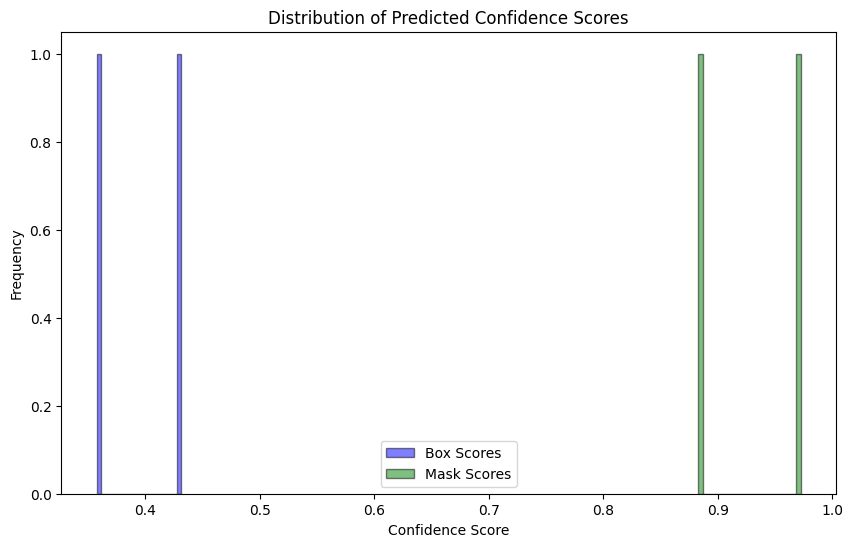

In [ ]:
# Example usage:
# Assuming you have a list of results from your model.predict call, e.g.,
# results = model.predict([image_pil], [text_prompt])
# You can then call:
plot_prediction_confidences(results)

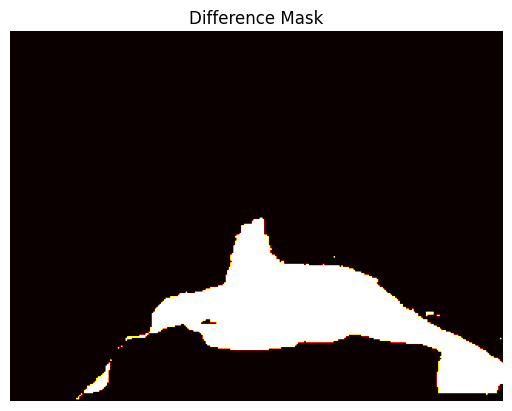

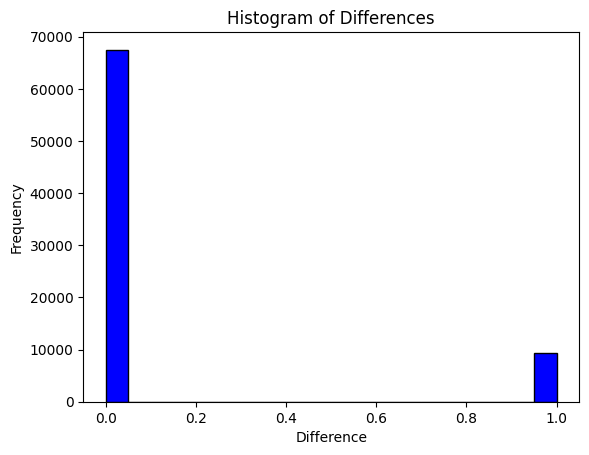

Average Difference: 0.12098958333333333


In [ ]:
visual_image = Image.open("/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/VISUAL_EXAMPLE.png").convert("RGB")
thermal_image = Image.open("/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/THERMAL_EXAMPLE.png").convert("RGB")
text_prompt = "escalator"

# Combined masks for visual and thermal images
combined_mask_visual = get_combined_mask(visual_image, text_prompt)
combined_mask_thermal = get_combined_mask(thermal_image, text_prompt)

# Difference mask is displayed and computed
difference_mask = np.abs(combined_mask_visual.astype(int) - combined_mask_thermal.astype(int))
plt.title("Difference Mask")
plt.imshow(difference_mask, cmap='hot')
plt.axis('off')
plt.show()

# Histogram of differences from the difference mask
plt.title("Histogram of Differences")
plt.hist(difference_mask.ravel(), bins=20, color='blue', edgecolor='black')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# Calculate average difference
average_difference = np.mean(difference_mask)
print(f"Average Difference: {average_difference}")

In [ ]:
# Process all image pairs
all_differences = []
visual_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL"
thermal_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL"

visual_image_paths = sorted([os.path.join(visual_dir, f) for f in os.listdir(visual_dir) if f.endswith('.jpg')])
thermal_image_paths = sorted([os.path.join(thermal_dir, f) for f in os.listdir(thermal_dir) if f.endswith('.jpg')])

for vis_path, therm_path in zip(visual_image_paths, thermal_image_paths):
    try:
        vis_img = Image.open(vis_path).convert("RGB")
        therm_img = Image.open(therm_path).convert("RGB")

        mask_visual = get_combined_mask(vis_img, "pavement")
        mask_thermal = get_combined_mask(therm_img, "pavement")

        # # Calculate the scale factor
        # scale_factor = calculate_scale_factor(mask_visual, mask_thermal)

        # # Scale the smaller mask
        # if mask_visual.sum() < mask_thermal.sum():
        #     mask_visual_resized = resize_mask(mask_visual, scale_factor)
        #     mask_thermal_resized = mask_thermal
        # else:
        #     mask_visual_resized = mask_visual
        #     mask_thermal_resized = resize_mask(mask_thermal, scale_factor)

        # Calculate the difference mask
        difference_mask = np.abs(mask_visual.astype(int) - mask_thermal.astype(int))
        all_differences.append(np.mean(difference_mask))
        print(f"Processed {vis_path} and {therm_path} successfully!")

    except Exception as e:
        print(f"Error processing {vis_path} and {therm_path}: {e}")

Processed /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL/VISUAL0104.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL/FLIR0104.jpg successfully!
Processed /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL/VISUAL01040601.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL/FLIR01040601.jpg successfully!
Processed /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL/VISUAL01040602.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL/FLIR01040602.jpg successfully!
Processed /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL/VISUAL01040603.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL/FLIR01040603.jpg successfully!
Processed /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/AL

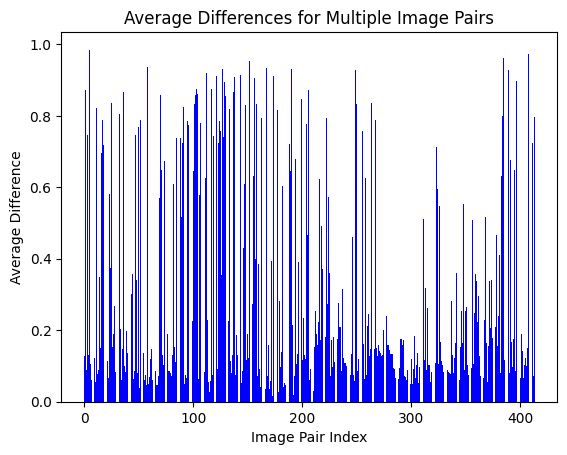

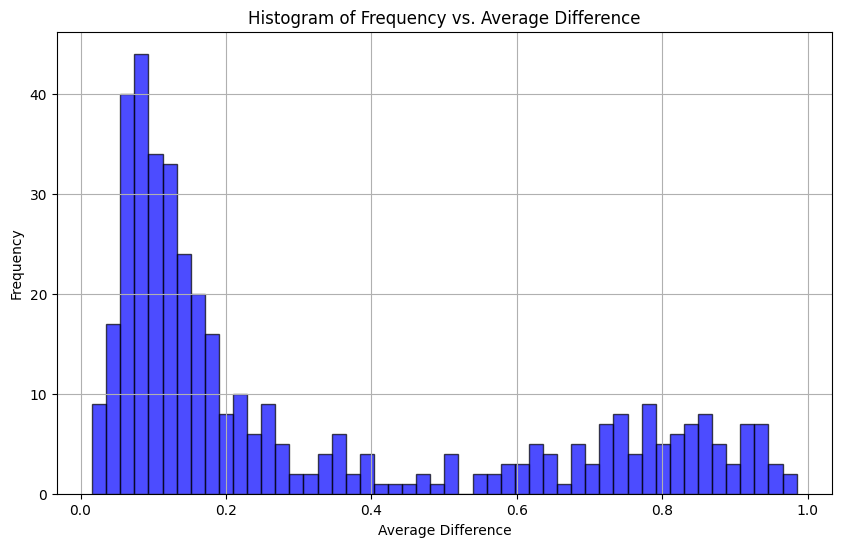

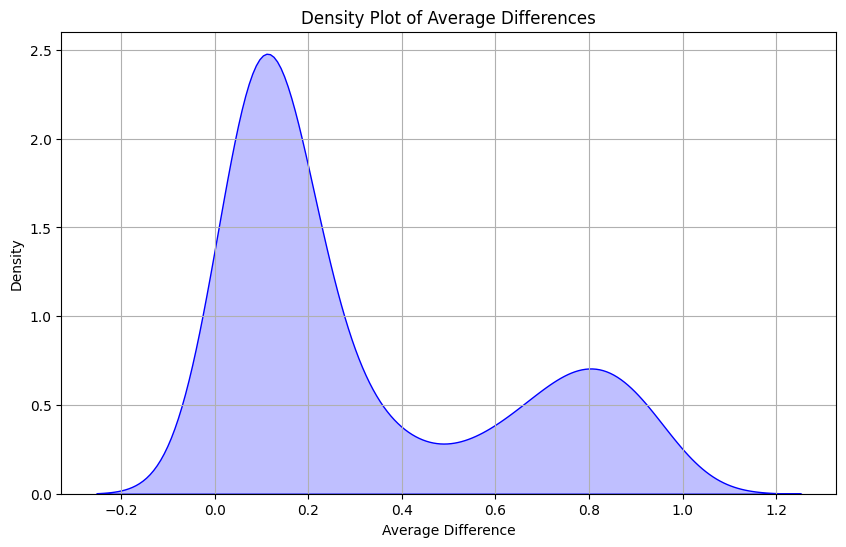

In [ ]:
# Display average differences for multiple image pairs
plt.title("Average Differences for Multiple Image Pairs")
plt.bar(range(len(all_differences)), all_differences, color='blue')
plt.xlabel('Image Pair Index')
plt.ylabel('Average Difference')
plt.show()

# Plot Histogram of Frequency vs. Average Difference
plt.figure(figsize=(10, 6))
plt.hist(all_differences, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Average Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency vs. Average Difference')
plt.grid(True)
plt.show()

# Plot Density Plot of Average Differences
plt.figure(figsize=(10, 6))
sns.kdeplot(all_differences, fill=True, color="blue")
plt.xlabel('Average Difference')
plt.ylabel('Density')
plt.title('Density Plot of Average Differences')
plt.grid(True)
plt.show()

In [ ]:
# Process all image pairs and save to a new directory for Pix2Pix testing
visual_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_VISUAL"
thermal_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL"

def save_for_pix2pix(visual_dir, thermal_dir, text_prompt):
    visual_image_paths = sorted([os.path.join(visual_dir, f) for f in os.listdir(visual_dir) if f.endswith('.jpg')])
    thermal_image_paths = sorted([os.path.join(thermal_dir, f) for f in os.listdir(thermal_dir) if f.endswith('.jpg')])

    for vis_path, therm_path in zip(visual_image_paths, thermal_image_paths):
        try:
            # Extract the filename from the path
            vis_filename = os.path.basename(vis_path)
            therm_filename = os.path.basename(therm_path)

            # Remove the file extension
            visfile_without_extension = os.path.splitext(vis_filename)[0]
            thermfile_without_extension = os.path.splitext(therm_filename)[0]

            # Extract the numeric part (assuming the numeric part always starts after "VISUAL" or "THERMAL")
            vis_numeric_part = visfile_without_extension.replace("VISUAL", "")
            therm_numeric_part = visfile_without_extension.replace("THERMAL", "")

            vis_img = Image.open(vis_path).convert("RGB")
            therm_img = Image.open(therm_path).convert("RGB")

            mask_visual = get_combined_mask(vis_img, text_prompt)
            mask_thermal = get_combined_mask(therm_img, text_prompt)

            np_visual = np.array(vis_img)
            np_thermal = np.array(therm_img)

            final_visual = masks_overlaid(np_visual, mask_visual)
            final_thermal = masks_overlaid(np_thermal, mask_thermal)

            new_visual_path = f"/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL/{text_prompt.upper()}{vis_numeric_part}.jpg"
            new_thermal_path = f"/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_THERMAL/{text_prompt.upper()}{therm_numeric_part}.jpg"
            final_visual.save(new_visual_path)
            final_thermal.save(new_thermal_path)

            print(f"Saved {new_visual_path} and {new_thermal_path} as masked rasters in the NEW_VISUAL or NEW_THERMAL folder successfully!")

        except Exception as e:
            print(f"Error processing {new_visual_path} and {new_thermal_path}: {e}")

In [ ]:
save_for_pix2pix("/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/VAL_VISUAL", "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/VAL_THERMAL", "pavement")

Saved /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL/PAVEMENT0080.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_THERMAL/PAVEMENTVISUAL0080.jpg as masked rasters in the NEW_VISUAL or NEW_THERMAL folder successfully!
Saved /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL/PAVEMENT0081.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_THERMAL/PAVEMENTVISUAL0081.jpg as masked rasters in the NEW_VISUAL or NEW_THERMAL folder successfully!
Saved /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL/PAVEMENT0082.jpg and /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_THERMAL/PAVEMENTVISUAL0082.jpg as masked rasters in the NEW_VISUAL or NEW_THERMAL folder successfully!
Saved /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL/PAVEMENT0083.jpg

In [ ]:
import os

# Directory paths
new_thermal_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_THERMAL"
new_visual_dir = "/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/NEW_VAL_VISUAL"

# Rename files in NEW_THERMAL directory
for filename in os.listdir(new_thermal_dir):
    if filename.startswith("PAVEMENTVISUAL") and filename.endswith(".jpg"):
        new_filename = filename.replace("PAVEMENTVISUAL", "PAVEMENTTHERMAL")
        os.rename(os.path.join(new_thermal_dir, filename), os.path.join(new_thermal_dir, new_filename))
        print(f"Renamed {filename} to {new_filename} in NEW_VAL_THERMAL directory")

# Rename files in NEW_VISUAL directory
for filename in os.listdir(new_visual_dir):
    if filename.startswith("PAVEMENT") and filename.endswith(".jpg"):
        base_name = filename[:-4]  # Remove the .jpg extension
        number_part = base_name.split("PAVEMENT")[-1]  # Get the part after 'PAVEMENT'
        new_filename = f"PAVEMENTVISUAL{number_part}.jpg"
        os.rename(os.path.join(new_visual_dir, filename), os.path.join(new_visual_dir, new_filename))
        print(f"Renamed {filename} to {new_filename} in NEW_VAL_VISUAL directory")

print("Renaming complete.")

Renamed PAVEMENTVISUAL0080.jpg to PAVEMENTTHERMAL0080.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0081.jpg to PAVEMENTTHERMAL0081.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0082.jpg to PAVEMENTTHERMAL0082.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0083.jpg to PAVEMENTTHERMAL0083.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0084.jpg to PAVEMENTTHERMAL0084.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0085.jpg to PAVEMENTTHERMAL0085.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0086.jpg to PAVEMENTTHERMAL0086.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0087.jpg to PAVEMENTTHERMAL0087.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0088.jpg to PAVEMENTTHERMAL0088.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0089.jpg to PAVEMENTTHERMAL0089.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0090.jpg to PAVEMENTTHERMAL0090.jpg in NEW_VAL_THERMAL directory
Renamed PAVEMENTVISUAL0091.jpg to PAVEMENTT

# **RoMa, deprecated**

In [ ]:
if __name__ == "__main__":
  from argparse import ArgumentParser
  parser = ArgumentParser()
  parser.add_argument("--mask_A_path", default="/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ROMA Results/FILLED020255.jpg", type=str)
  parser.add_argument("--im_B_path", default="/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ALL_THERMAL/FLIR020255.jpg", type=str)

  args, _ = parser.parse_known_args()
  mask_A_path = args.mask_A_path
  im2_path = args.im_B_path

  # Create model
  print("Creating model...")
  roma_model = roma_outdoor(device=device, coarse_res=560, upsample_res=(864, 1152))
  print("Model created.")

  H, W = roma_model.get_output_resolution()
  print(f"Output resolution: {H} x {W}")

Creating model...


Downloading: "https://github.com/Parskatt/storage/releases/download/roma/roma_outdoor.pth" to /root/.cache/torch/hub/checkpoints/roma_outdoor.pth
100%|██████████| 425M/425M [00:00<00:00, 504MB/s]
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vitl14/dinov2_vitl14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vitl14_pretrain.pth
100%|██████████| 1.13G/1.13G [00:03<00:00, 391MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Using coarse resolution (560, 560), and upsample res (864, 1152)
Model created.
Output resolution: 864 x 1152


In [ ]:
if __name__ == "__main__":
  maskA = Image.open(mask_A_path).resize((W, H)).convert('RGB')
  im2 = Image.open(im2_path).resize((W, H)).convert('RGB')
  print("Images and mask loaded and resized.")

  # Move images and mask to the device
  maskA = (torch.tensor(np.array(maskA)) / 255).permute(2, 0, 1).to(device)
  im2 = (torch.tensor(np.array(im2)) / 255).permute(2, 0, 1).to(device)
  print("Images and mask moved to device.")

Images and mask loaded and resized.
Images and mask moved to device.


In [ ]:
if __name__ == "__main__":
  # Match
  print("Starting matching process...")
  warp, certainty = roma_model.match(mask_A_path, im2_path, device=device)
  print("Matching process completed.")

Starting matching process...
Matching process completed.


In [ ]:
save_path="/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ROMA Results/FILLMATCH020255.jpg"

if __name__ == "__main__":
  maskA_transfer_rgb = F.grid_sample(
    maskA[None], warp[:, :W, 2:][None].to(device), mode="bilinear", align_corners=False
  )[0]

  im2_transfer_rgb = F.grid_sample(
    im2[None], warp[:, W:, :2][None].to(device), mode="bilinear", align_corners=False
  )[0]

  warp_im = torch.cat((maskA_transfer_rgb, im2_transfer_rgb), dim=2)
  white_im = torch.ones((3, H, 2 * W), device=device)
  vis_im = certainty * warp_im + (1 - certainty) * white_im

  tensor_to_pil(vis_im, unnormalize=False).save(save_path)
  print(f"Result saved to {save_path}")

Result saved to /content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ROMA Results/FILLMATCH020255.jpg


In [ ]:
import cv2

W_A, H_A = Image.open(mask_A_path).size
W_B, H_B = Image.open(im2_path).size

# Sample matches for estimation
matches, certainty = roma_model.sample(warp, certainty)
kpts1, kpts2 = roma_model.to_pixel_coordinates(matches, H_A, W_A, H_B, W_B)
F, mask = cv2.findFundamentalMat(
    kpts1.cpu().numpy(), kpts2.cpu().numpy(), ransacReprojThreshold=0.2, method=cv2.USAC_MAGSAC, confidence=0.999999, maxIters=10000
)

Fundamental Matrix (F):
[[ 3.22045786e-08 -5.44729636e-07  1.38650282e-06]
 [-1.68656667e-07  3.06189758e-04 -2.23717112e-04]
 [-1.16366601e-06 -1.17820087e-04  4.80205199e-05]]


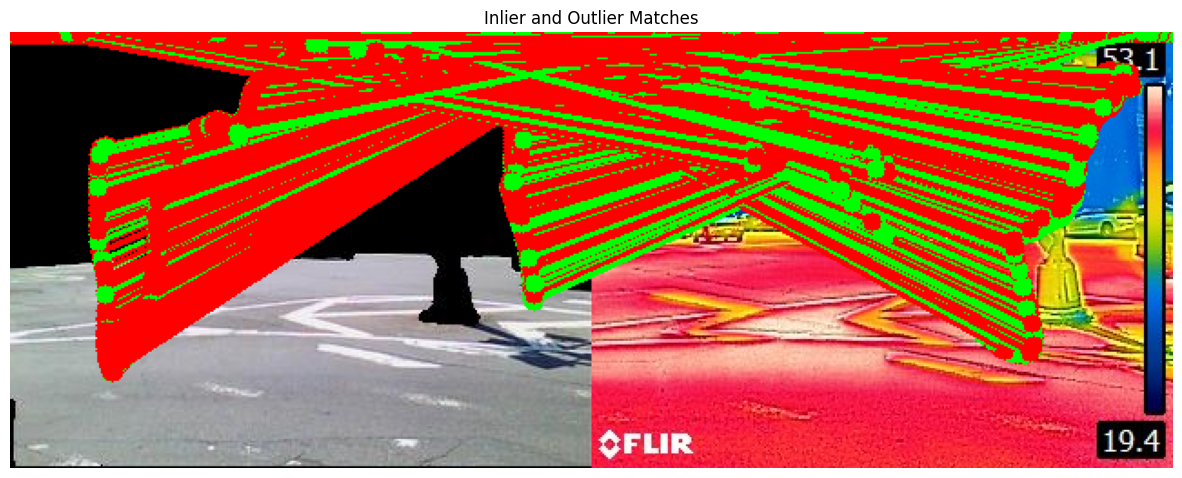

In [ ]:
# Print the Fundamental Matrix
print("Fundamental Matrix (F):")
print(F)

# Visualize Inliers and Outliers
# Load the original images
mask_A = cv2.imread(args.mask_A_path)
im_B = cv2.imread(args.im_B_path)

# Convert keypoints to integer coordinates for visualization
kpts1 = kpts1.cpu().numpy().astype(int)
kpts2 = kpts2.cpu().numpy().astype(int)

# Create a combined image to display matches
combined_image = np.hstack((mask_A, im_B))

# Draw inliers and outliers
for i, m in enumerate(mask):
    if m:
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)

    pt1 = (kpts1[i][0], kpts1[i][1])
    pt2 = (kpts2[i][0] + W_A, kpts2[i][1])

    cv2.circle(combined_image, pt1, 5, color, -1)
    cv2.circle(combined_image, pt2, 5, color, -1)
    cv2.line(combined_image, pt1, pt2, color, 2)

# Convert combined image to RGB for plotting
combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(15, 10))
plt.title("Inlier and Outlier Matches")
plt.imshow(combined_image_rgb)
plt.axis('off')
plt.show()

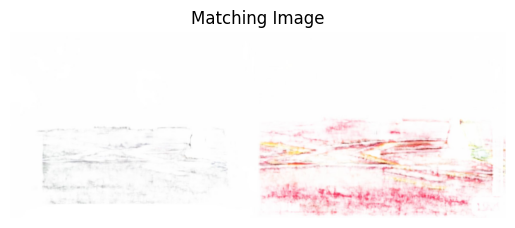

In [ ]:
image_final = Image.open('/content/drive/MyDrive/Job-Related Applications + Other Stuff/NASA GISS/ROMA Results/FILLMATCH020255.jpg')
plt.title("Matching Image")
plt.imshow(image_final)
plt.axis('off')  # Hide axes
plt.show()